In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
sns.set_style('whitegrid')
pi = np.pi

## Datasets

In [2]:
# iris
iris = sns.load_dataset('iris')
iris.sample(10)

# seaborn tip data
tips = sns.load_dataset('tips')
tips['tip_pct'] = tips.tip / tips.total_bill * 100
tips.shape
tips.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
136,6.3,3.4,5.6,2.4,virginica
37,4.9,3.6,1.4,0.1,setosa
63,6.1,2.9,4.7,1.4,versicolor
112,6.8,3.0,5.5,2.1,virginica
134,6.1,2.6,5.6,1.4,virginica
79,5.7,2.6,3.5,1.0,versicolor
145,6.7,3.0,5.2,2.3,virginica
143,6.8,3.2,5.9,2.3,virginica
28,5.2,3.4,1.4,0.2,setosa
91,6.1,3.0,4.6,1.4,versicolor


(244, 8)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
43,9.68,1.32,Male,No,Sun,Dinner,2,13.636364
241,22.67,2.00,Male,Yes,Sat,Dinner,2,8.822232
185,20.69,5.00,Male,No,Sun,Dinner,5,24.166264
107,25.21,4.29,Male,Yes,Sat,Dinner,2,17.017057
181,23.33,5.65,Male,Yes,Sun,Dinner,2,24.217745
153,24.55,2.00,Male,No,Sun,Dinner,4,8.146640
50,12.54,2.50,Male,No,Sun,Dinner,2,19.936204
178,9.60,4.00,Female,Yes,Sun,Dinner,2,41.666667
200,18.71,4.00,Male,Yes,Thur,Lunch,3,21.378942
53,9.94,1.56,Male,No,Sun,Dinner,2,15.694165


## Seaborn multivariate plots
- catplot
- pairplot (PairGrid)
- facetgrid
- regplot

### catplot
This function shows the relationship between a numerical and one or more categorical variables using one of several visual representations. The kind parameter selects the underlying axes-level function to use:
- kind: strip/swarm, box/boxen/violin, point/bar/count

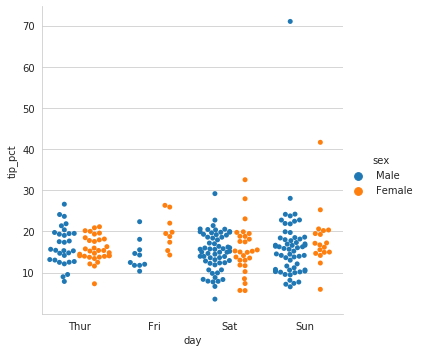

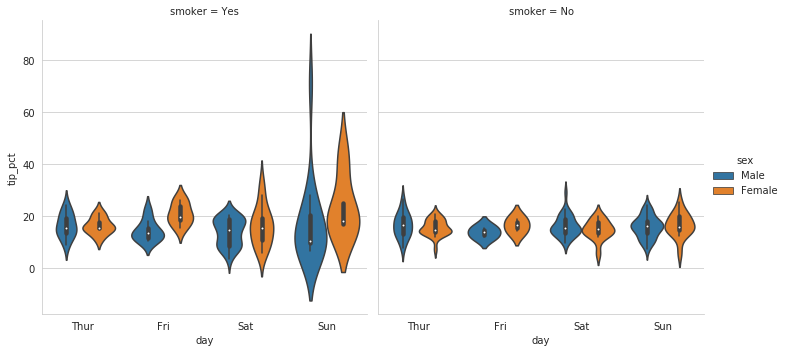

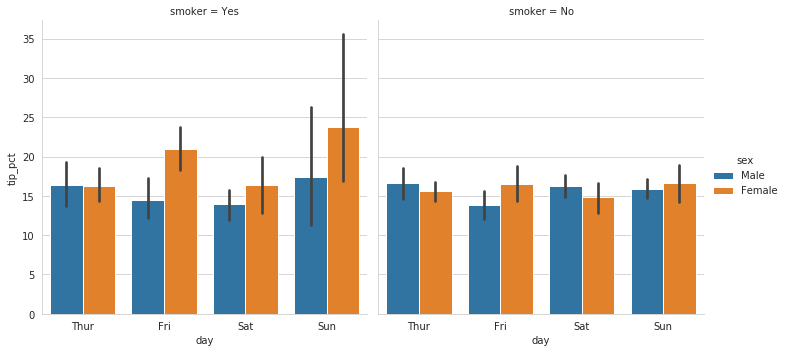

In [3]:
sns.catplot(data=tips, x='day', y='tip_pct', hue='sex', kind='swarm', dodge=True);
sns.catplot(data=tips, x='day', y='tip_pct', hue='sex', kind='violin', col='smoker');
sns.catplot(data=tips, x='day', y='tip_pct', hue='sex', col='smoker', kind='bar');

### pairplot
Pairplot will create a grid of Axes such that each numeric variable in data will by shared in the y-axis across a single row and in the x-axis across a single column.
Cross plot between numerical variables. row/col is one numerical variable each.
- By default, diagonal plot are univariate histogram, or kde plot is hue is specified, diag_kind=auto/hist/kde
- non-diagonal plots are scatter plot. kind='scatter' or 'reg'/regression
- sns.PairGrid is a more generic way to do pairplot. can specify map_diag, map_offdiag (even map_upper, map_lower)

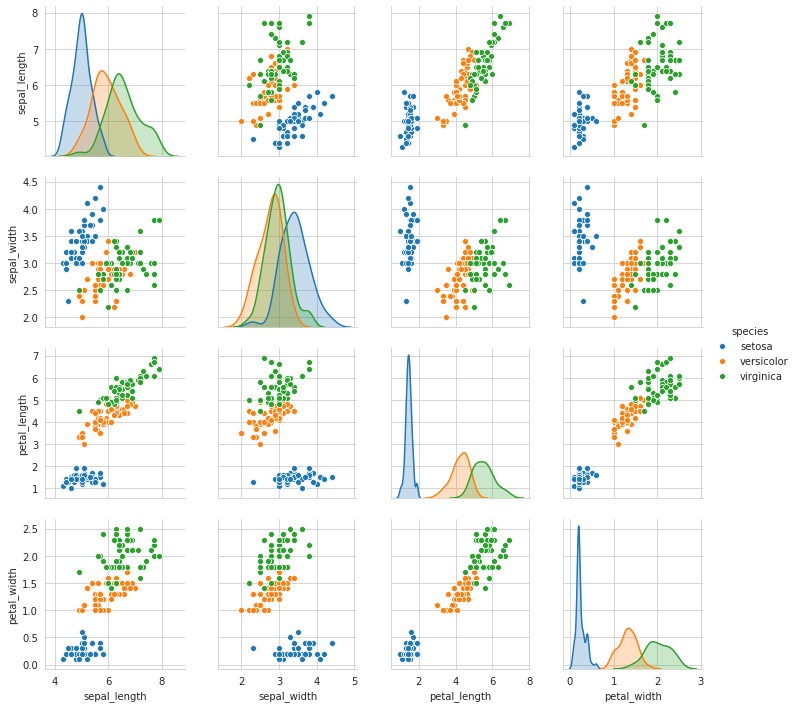

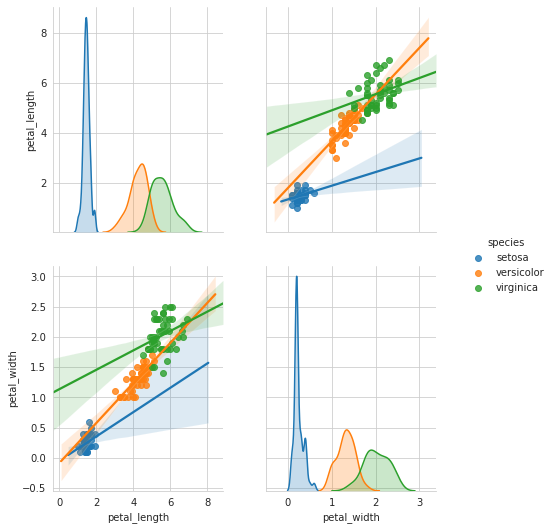

In [4]:
# pairplot for iris with hue
sns.pairplot(data=iris, hue='species');

# plot a subset, specify diag_kind and kind
g= sns.pairplot(data=iris, vars=['petal_length', 'petal_width'], hue='species',
            kind='reg');#, height=8, aspect=1);
g.fig.set_size_inches(8, 8);

### facetgrid
Multi-plot grid for plotting conditional relationships. row/col is values of categorical variables.
- create grid using row, col, or hue use categorical variables
- map a plot function to grid with typically numerical variables
- return grid object, contains grid.fig, grid.axes

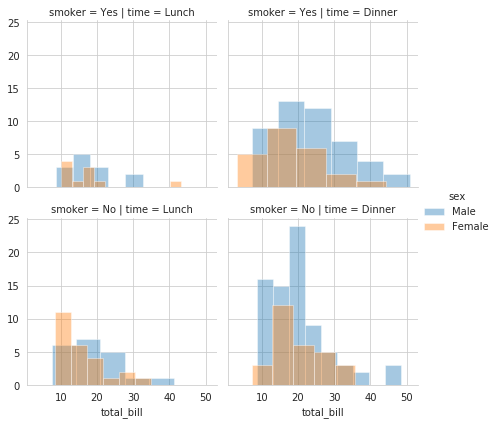

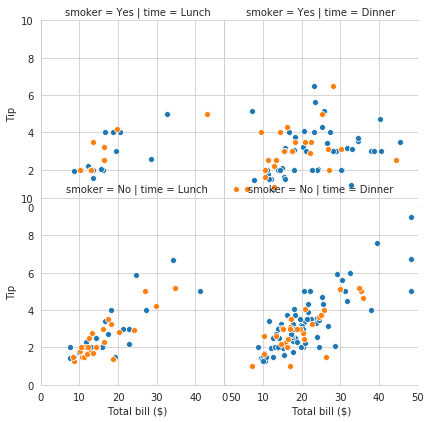

In [5]:
# apply hitogram for combination of different time, smoker values, sex as hue
# default sharex and sharey
# add legend, default no legend
g = sns.FacetGrid(tips, col='time', row='smoker', hue='sex');
g1 = g.map(sns.distplot, 'total_bill', kde=False).add_legend();
# g1.fig
g1.axes

# apply scatter plot, need two numerical variables
# apply settings
g = sns.FacetGrid(tips, col='time', row='smoker', hue='sex');
g2 = (g.map(sns.scatterplot, 'total_bill', 'tip')
     .set_axis_labels('Total bill ($)', 'Tip')
     .set(xlim=(0, 50), ylim=(0, 10))
     .fig.subplots_adjust(wspace=-0.05, hspace=-0.05)  # after this fig setting, return None
    );

### Replot
Plot data and a linear regression model fit.

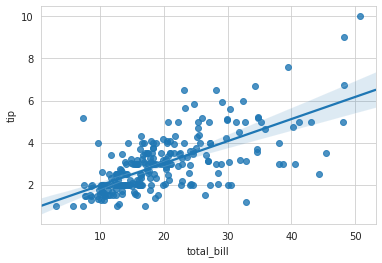

In [6]:
sns.regplot(x="total_bill", y="tip", data=tips);